# Debate Results Analysis

Comparing accuracy across three conditions:
1. **Debater Direct**: Debater LLM answers directly
2. **Judge Direct**: Judge LLM answers directly
3. **Non-Interactive Debate**: Debaters debate, judge decides


In [1]:
import json
import pandas as pd


In [2]:
# Load the results
results = []
with open('parallel_debate_runs/run_20251017_121343/master_results.jsonl', 'r') as f:
    for line in f:
        if line.strip():
            results.append(json.loads(line))

print(f"Total results: {len(results)}")


Total results: 20


In [3]:
# Calculate accuracy for each condition
debater_correct = sum(1 for r in results if r['debater_direct']['correct'])
judge_correct = sum(1 for r in results if r['judge_direct']['correct'])
debate_correct = sum(1 for r in results if r['modes']['non_interactive']['correct'])

total = len(results)

accuracy_data = {
    'Condition': ['Debater Direct', 'Judge Direct', 'Non-Interactive Debate'],
    'Correct': [debater_correct, judge_correct, debate_correct],
    'Total': [total, total, total],
    'Accuracy': [
        debater_correct / total,
        judge_correct / total,
        debate_correct / total
    ]
}

df = pd.DataFrame(accuracy_data)
df['Accuracy %'] = (df['Accuracy'] * 100).round(2)
df


Condition  Correct  Total  Accuracy  Accuracy %
0          Debater Direct       10     20       0.5        50.0
1            Judge Direct        8     20       0.4        40.0
2  Non-Interactive Debate       10     20       0.5        50.0

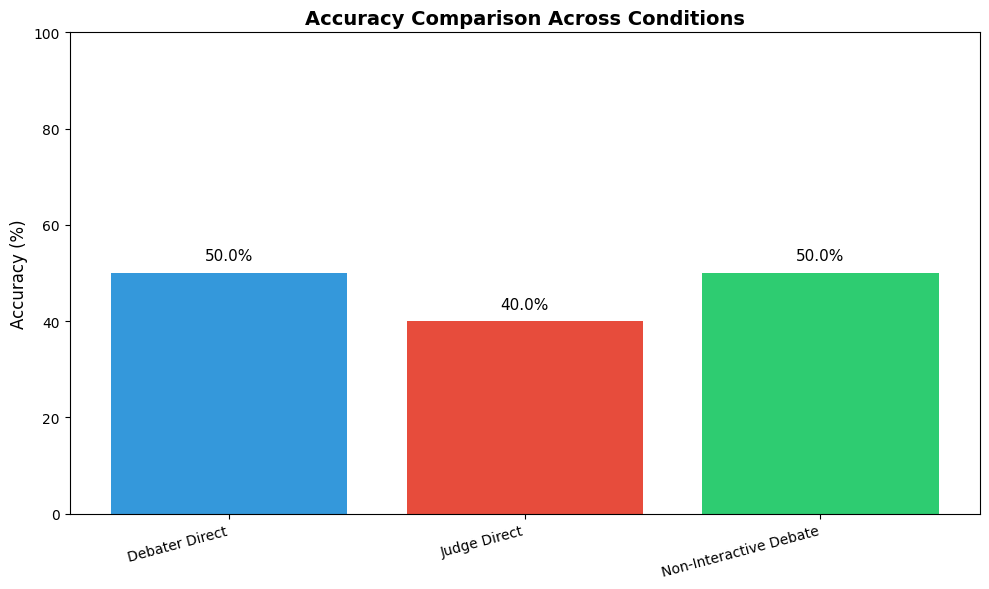

In [4]:
# Simple visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df['Condition'], df['Accuracy %'], color=['#3498db', '#e74c3c', '#2ecc71'])
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Accuracy Comparison Across Conditions', fontsize=14, fontweight='bold')
plt.ylim(0, 100)
plt.xticks(rotation=15, ha='right')

# Add value labels on bars
for i, v in enumerate(df['Accuracy %']):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()
